## Homework #5
#### Author: `<Anastasiia> <Krzheshevska>`
#### Total time spent on h/w (in minutes): `<1400>`

In [33]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
import re
import emoji as emojilib
import os

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(8, 6)})
plt.rc('axes', unicode_minus=False)

In [2]:
DIALOGS_MERGED_DATA_PATH = "C:/data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "C:/data/merged_data/dialogs_users_all.csv"

In [3]:
df1 = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df2 = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

C:\Users\Anastasija\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
size = os.path.getsize(DIALOGS_MERGED_DATA_PATH) 
print('Size of file is', size, 'bytes')

Size of file is 122288166 bytes


In [5]:
df1.head(3)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,896,2022-02-22 13:10:49+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,text,NaN,-1001121077046
1,895,2022-02-22 13:10:41+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,​​Твоя тривога має місце бути.\n\nМи справді н...,photo,NaN,-1001121077046
2,894,2022-02-21 15:50:55+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046


In [6]:
df2.head(3)

,dialog_id,name,type,users
0,-1001157055007,Украшения,Channel,"{'user_id': 564960030, 'first_name': 'Анастаси..."
1,-1001166945561,Музыка,Channel,"{'user_id': 872142485, 'first_name': 'Мама', '..."
2,-1001166945561,Музыка,Channel,"{'user_id': 564960030, 'first_name': 'Анастаси..."


In [7]:
df = df1.append(df2)

In [8]:
df.head(12)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id,name,users
0,896.0,2022-02-22 13:10:49+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,text,NaN,-1001121077046,NaN,NaN
1,895.0,2022-02-22 13:10:41+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,​​Твоя тривога має місце бути.\n\nМи справді н...,photo,NaN,-1001121077046,NaN,NaN
2,894.0,2022-02-21 15:50:55+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046,NaN,NaN
3,893.0,2022-02-14 13:10:05+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,"​​​​Можливо, ти сьогодні пішов на пари чи робо...",photo,NaN,-1001121077046,NaN,NaN
4,892.0,2022-02-14 10:30:06+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046,NaN,NaN
5,891.0,2022-02-12 14:00:04+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,​​Маєш пару на 14-те?\n\nЧи ти та сама людинка...,photo,NaN,-1001121077046,NaN,NaN
6,890.0,2022-02-10 10:00:04+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,"​​​​Любов варта всього, пам'ятаєш же?\n\nМи ві...",photo,NaN,-1001121077046,NaN,NaN
7,889.0,2022-02-07 12:00:19+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046,NaN,NaN
8,888.0,2022-02-03 10:00:10+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,"​​Могилянка — твоя, моя, наша спільна — повсяк...",photo,NaN,-1001121077046,NaN,NaN
9,887.0,2022-01-31 07:01:01+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046,NaN,NaN


In [9]:
df.shape 

(727956, 11)

#### Data in relation to dates and times

In [10]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
df['hour'] = pd.DatetimeIndex(df['date']).hour

In [11]:

df['hour'] = df["hour"].dropna().astype("int")
df['day'] = df["day"].dropna().astype("int")
df['month'] = df["month"].dropna().astype("int")
df['year'] = df["year"].dropna().astype("int")

In [12]:
df.head(3)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id,name,users,year,month,day,hour
0,896.0,2022-02-22 13:10:49+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,text,NaN,-1001121077046,NaN,NaN,2022,2,22,13
1,895.0,2022-02-22 13:10:41+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,​​Твоя тривога має місце бути.\n\nМи справді н...,photo,NaN,-1001121077046,NaN,NaN,2022,2,22,13
2,894.0,2022-02-21 15:50:55+00:00,NaN,PeerChannel(channel_id=1121077046),NaN,NaN,photo,NaN,-1001121077046,NaN,NaN,2022,2,21,15


In [13]:
df2["users"] = df2.users.apply(lambda x: ast.literal_eval(x))
df2[['user_id', 'first_name', "last_name", "username", "phone"]] = df2['users'].apply(pd.Series)
df2.drop("users", axis=1, inplace=True)

In [14]:
df2.head(3)

,dialog_id,name,type,user_id,first_name,last_name,username,phone
0,-1001157055007,Украшения,Channel,564960030,Анастасия,Кржешевская,kryzhikk,380675093869
1,-1001166945561,Музыка,Channel,872142485,Мама,None,Krzeshevska,380672497021
2,-1001166945561,Музыка,Channel,564960030,Анастасия,Кржешевская,kryzhikk,380675093869


### Users in different chats with me

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


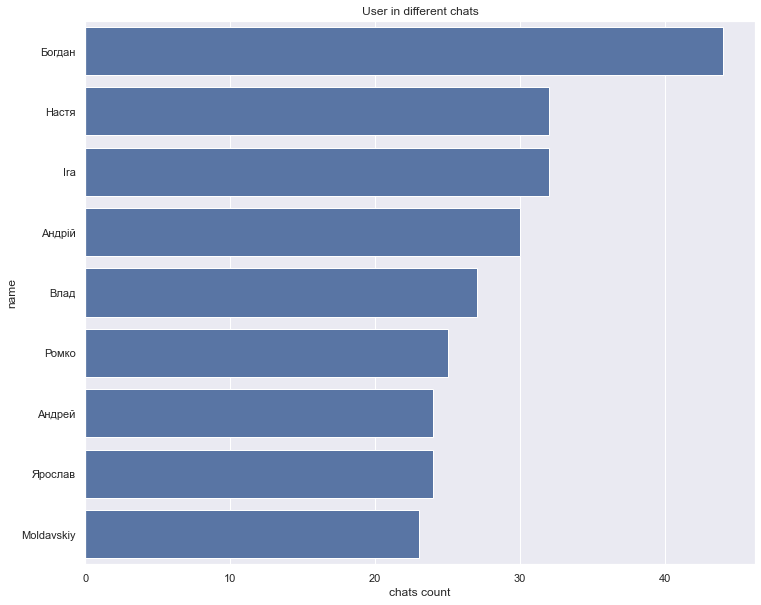

In [15]:
query16 = df2.groupby(["first_name"]).count().sort_values("name", ascending=False)["name"][1:10]
ax = sns.barplot(query16.values, query16.index, color="b")
ax.set_title("User in different chats")
ax.set(xlabel='chats count', ylabel='name')
plt.show()

### Messeges in private chat with me by time

In [16]:
df1['year'] = pd.DatetimeIndex(df1['date']).year
df1['month'] = pd.DatetimeIndex(df1['date']).month
df1['day'] = pd.DatetimeIndex(df1['date']).day
df1['hour'] = pd.DatetimeIndex(df1['date']).hour

df1['hour'] = df1["hour"].dropna().astype("int")
df1['day'] = df1["day"].dropna().astype("int")
df1['month'] = df1["month"].dropna().astype("int")
df1['year'] = df1["year"].dropna().astype("int")

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


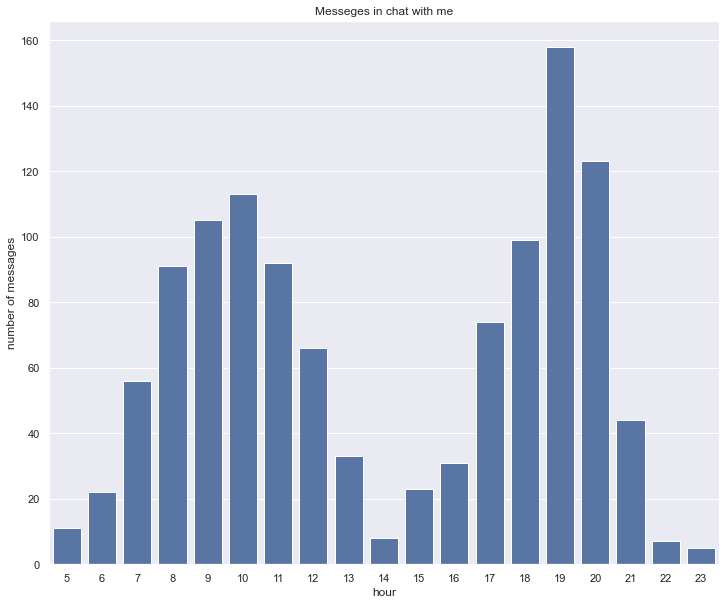

In [17]:
query17 = df[df["to_id"] == "564960030"].groupby("hour").count()["id"]
ax = sns.barplot(query17.index, query17.values, color="b")
ax.set_title("Messeges in chat with me")
ax.set(xlabel='hour', ylabel='number of messages')
plt.show()

### Top chats by people

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Anastasija\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anastasija\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 129699 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anastasija\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127775 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anastasija\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 127873 missing f

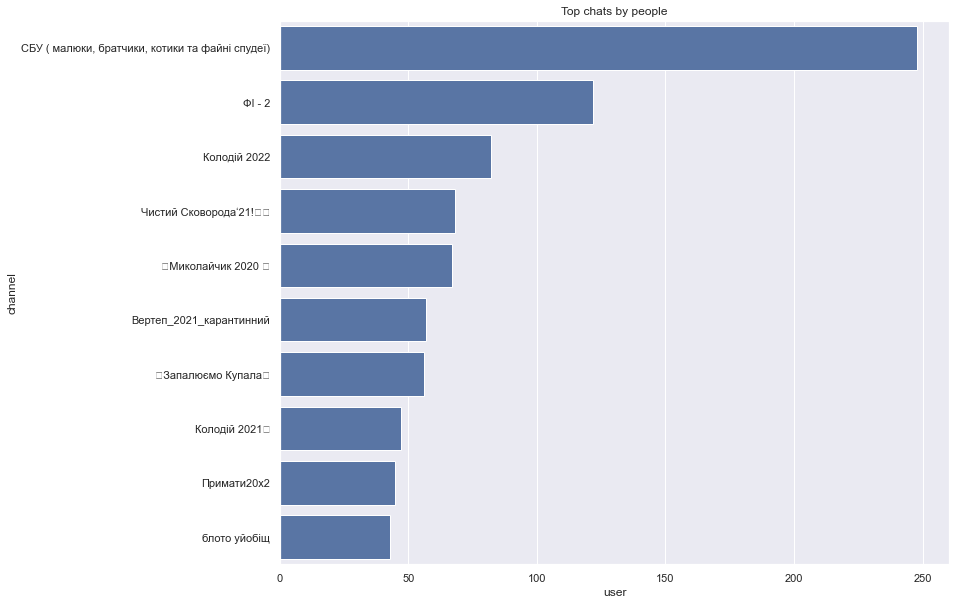

In [18]:
query25 = df2.groupby("name").count()["dialog_id"].sort_values(ascending=False)[:10]
ax = sns.barplot(query25.values, query25.index, color="b")
ax.set(xlabel='user', ylabel='channel')
ax.set_title("Top chats by people")
plt.show()

### Top words 

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


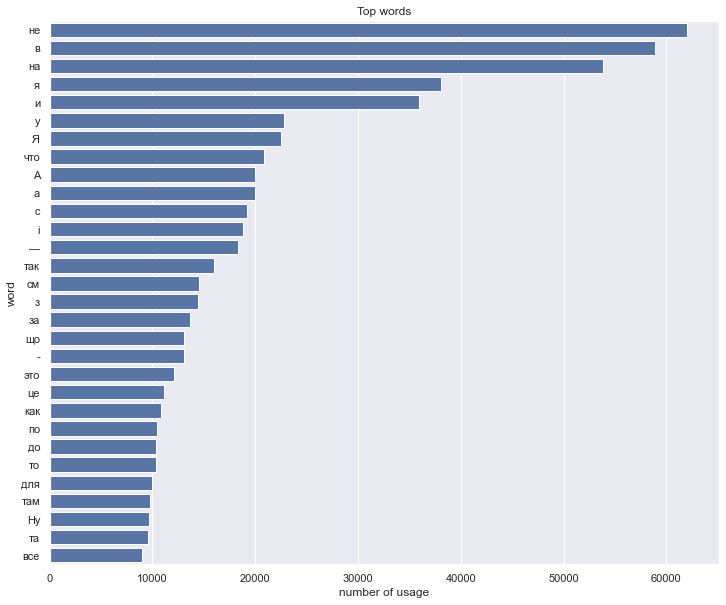

In [19]:
query20 = Counter(" ".join(df1[~df1["message"].isna()]["message"]).split()).most_common(30)
query20id, query20values = zip(*query20)
query20 = pd.Series(query20id, query20values)
ax = sns.barplot(query20.index, query20.values, color="b")
ax.set(xlabel='number of usage', ylabel='word')
ax.set_title("Top words")
sns.set_theme("paper")
plt.show()

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


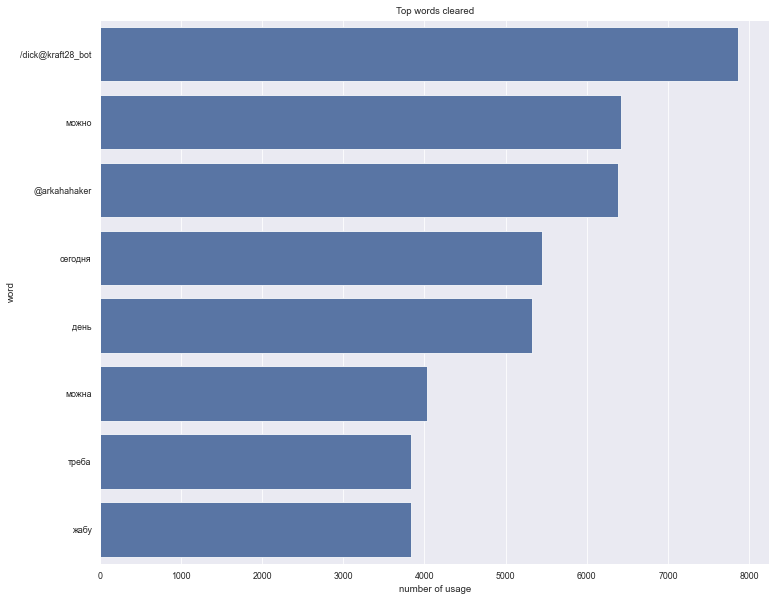

In [20]:
banlist = ["не", "в", "я", "на", "и", "а", "у", "что", "і", "так", "с", "—", "это", "з", "ну",
           "за", "см", "та", "це", "що", "как", "там", "-", "по", "то", "до", "ты", "для", "вы",
           "все", "но", "да", "просто", "ти", "если", "через", "меня", "як", "про", "+", "але",
           "уже", "будет", "мне", "вас", "ми", "или", "нас", "вам", "вже", "тут", "якщо",
           "тебе", "ще", "он", "о", "к", "см.", "мене", "буде", "2", "же", "є", "мы", "ст", "його",
           "вот", "от", "есть", "the", "чи", "1", "она", "из", "ж", "ещё", "только", "бы", "чтобы",
           "3", "шо", "тепер"]
query211 = pd.Series(' '.join(df1[~df1["message"].isna()]['message']).lower().split()).value_counts()[:]
query211 = pd.Series(query211.index, index=query211.values)
#query211 = query211[~query211.str.contains(banlist)][:8]
#query211 = query211[query211.str.len() > 4][:8]
query211 = query211[query211.apply(lambda x: x not in banlist)][:8]
ax = sns.barplot(query211.index, query211.values, color="b")
ax.set_title("Top words cleared")
ax.set(xlabel='number of usage', ylabel='word')
plt.show()

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


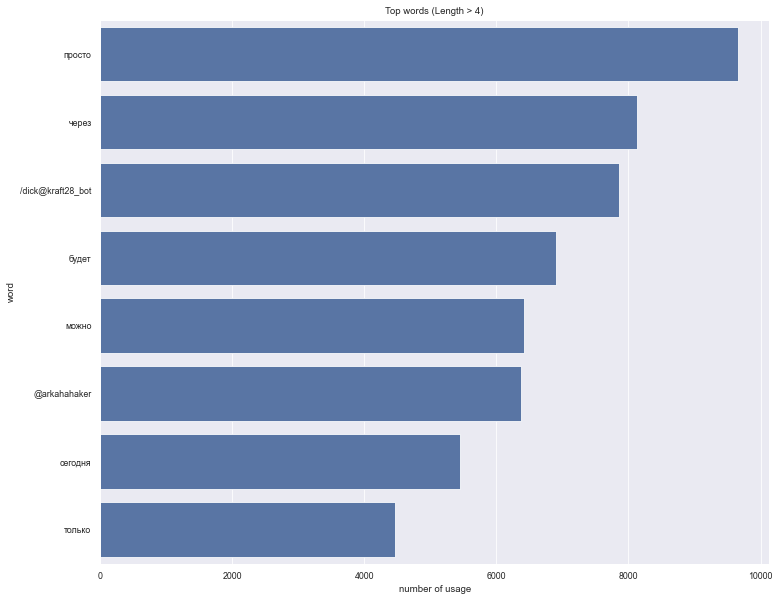

In [21]:
query21 = pd.Series(' '.join(df1[~df1["message"].isna()]['message']).lower().split()).value_counts()[:]
query21 = pd.Series(query21.index, index=query21.values)
query21 = query21[query21.str.len() > 4][:8]
ax = sns.barplot(query21.index, query21.values, color="b")
ax.set_title("Top words (Length > 4)")
ax.set(xlabel='number of usage', ylabel='word')
plt.show()

### Top stickers

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


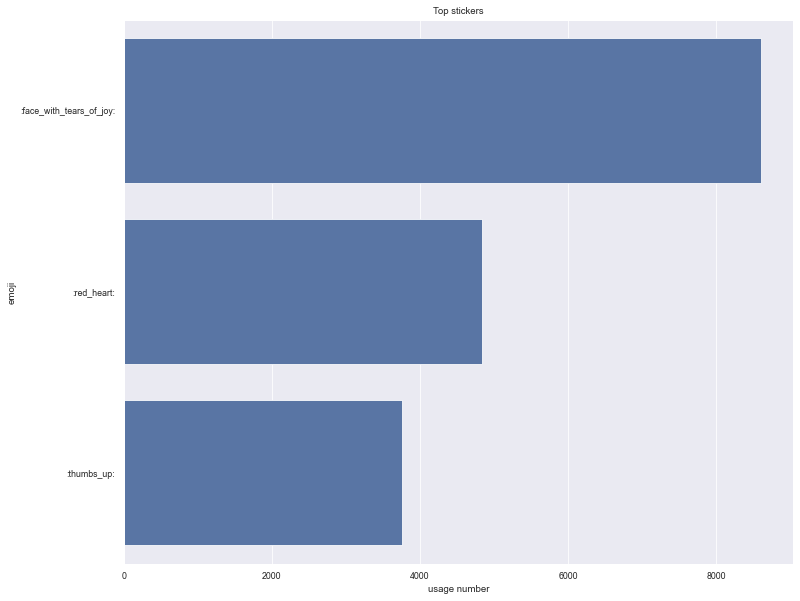

In [22]:
text_emoji_list = ["–", "’", "•", "—", " "]
query18 = dict()
for i in df1['message']:
    for emoji_text in re.findall(u'[\U0001f300-\U0001f650]|[\u2000-\u3000]', str(i)):
        if (emoji_text in query18):
            query18[emoji_text] += 1
        else:
            query18[emoji_text] = 1
        
query18 = pd.Series(query18).sort_values(ascending=False)[:4]
query18 = query18[~query18.index.isin(text_emoji_list)]
query18 = pd.Series(query18.index, index=query18.values)
query18 = query18.apply(lambda x: emojilib.demojize(x))
ax = sns.barplot(query18.index, query18.values, color="b")
ax.set_title("Top stickers")
ax.set(xlabel='usage number', ylabel='emoji')
plt.show()

#### Mean length of message per time

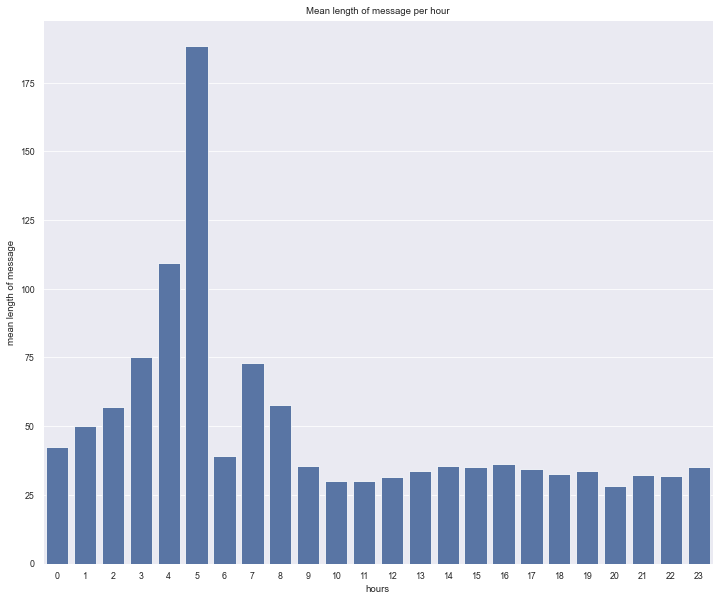

In [23]:
query1 = (df.groupby('hour')['message'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_len_message'))
query1["mean_len_message"] = query1["mean_len_message"].round(2)
plot = sns.barplot(x=query1["hour"], y=query1["mean_len_message"], color="b")
plot.set(xlabel="hours", ylabel="mean length of message")
plot.set_title('Mean length of message per hour')
plt.show()

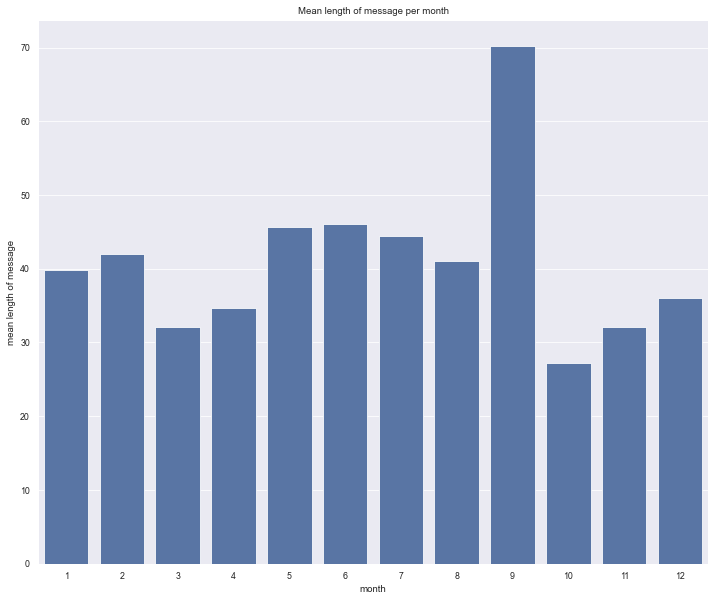

In [24]:
query2 = (df.groupby('month')['message'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_len_message'))
query2["mean_len_message"] = query2["mean_len_message"].round(2)
plot = sns.barplot(x=query2["month"], y=query2["mean_len_message"], color="b")
plot.set(xlabel="month", ylabel="mean length of message")
plot.set_title('Mean length of message per month')
plt.show()

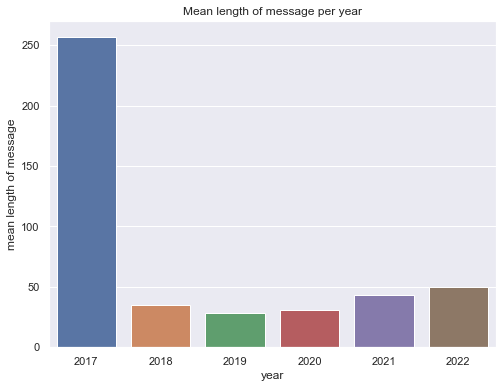

In [38]:
query3 = (df.groupby('year')['message'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_len_message'))
query3["mean_len_message"] = query3["mean_len_message"].round(2)
plot = sns.barplot(x=query3["year"], y=query3["mean_len_message"])
plot.set(xlabel="year", ylabel="mean length of message")
plot.set_title('Mean length of message per year')
plt.show()

#### Number of messages per time

Text(0.5, 1.0, 'Number of messages per year')

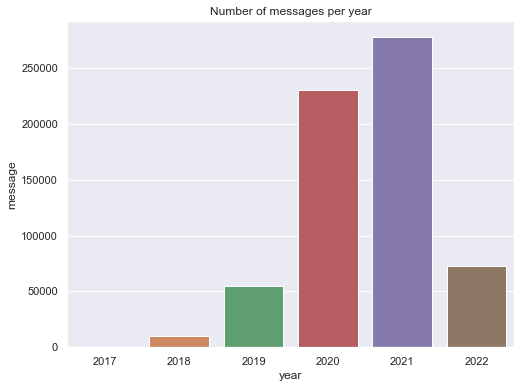

In [39]:
dt = df.groupby(['year']).count()
dt['year'] = dt.index.get_level_values(0)
sns.barplot(x="year", y="message", data=dt).set_title('Number of messages per year')

Text(0.5, 1.0, 'Number of messages per month')

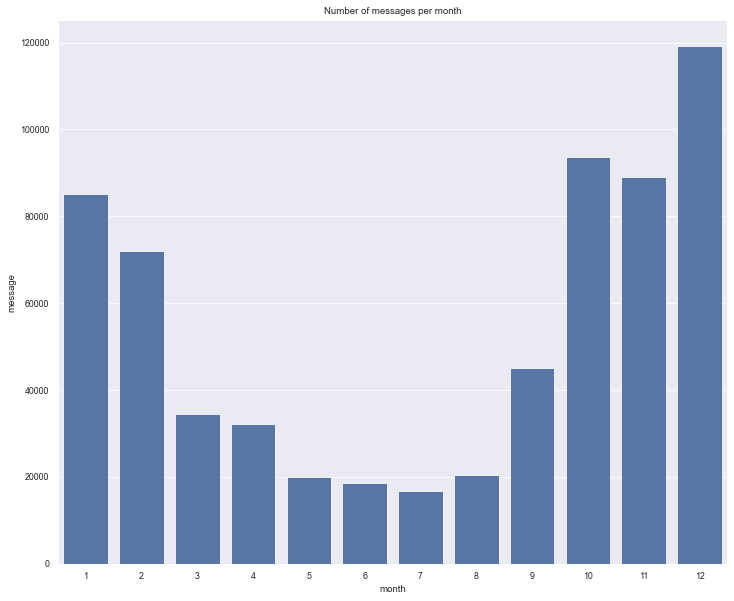

In [27]:
dt = df.groupby(['month']).count()
dt['month'] = dt.index.get_level_values(0)
sns.barplot(x="month", y="message", data=dt, color="b").set_title('Number of messages per month')

Text(0.5, 1.0, 'Number of messages per hour')

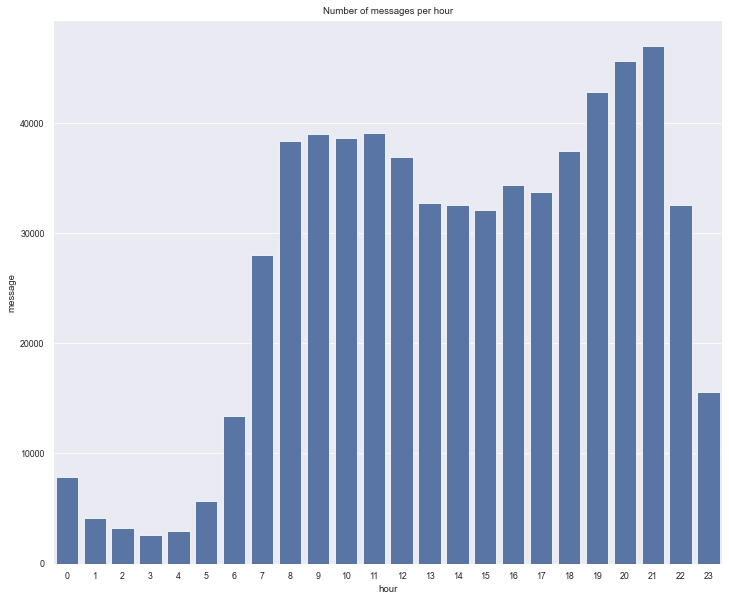

In [28]:
dt = df.groupby(['hour']).count()
dt['hour'] = dt.index.get_level_values(0)
sns.barplot(x="hour", y="message", data=dt, color="b").set_title('Number of messages per hour')

### NaN

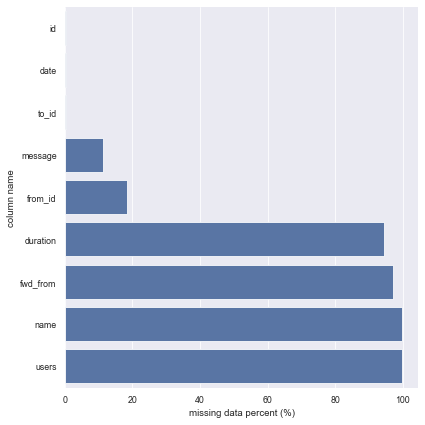

In [29]:
percent_missing = df.isnull().sum()*100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df["percent_missing"] = missing_value_df["percent_missing"].round(2)
missing_value_df = missing_value_df[missing_value_df["percent_missing"] != 0.00]
plot = sns.catplot(data=missing_value_df, kind="bar", x="percent_missing", y="column_name", ci="sd", color="b", height=6)
plot.despine(left=True)
plot.set_axis_labels("missing data percent (%)", "column name")
plt.show()

### Message type by time

In [29]:
df1['year'] = pd.DatetimeIndex(df1['date']).year
df1['month'] = pd.DatetimeIndex(df1['date']).month
df1['day'] = pd.DatetimeIndex(df1['date']).day
df1['hour'] = pd.DatetimeIndex(df1['date']).hour

df1['hour'] = df1["hour"].dropna().astype("int")
df1['day'] = df1["day"].dropna().astype("int")
df1['month'] = df1["month"].dropna().astype("int")
df1['year'] = df1["year"].dropna().astype("int")

C:\Users\Anastasija\anaconda3\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


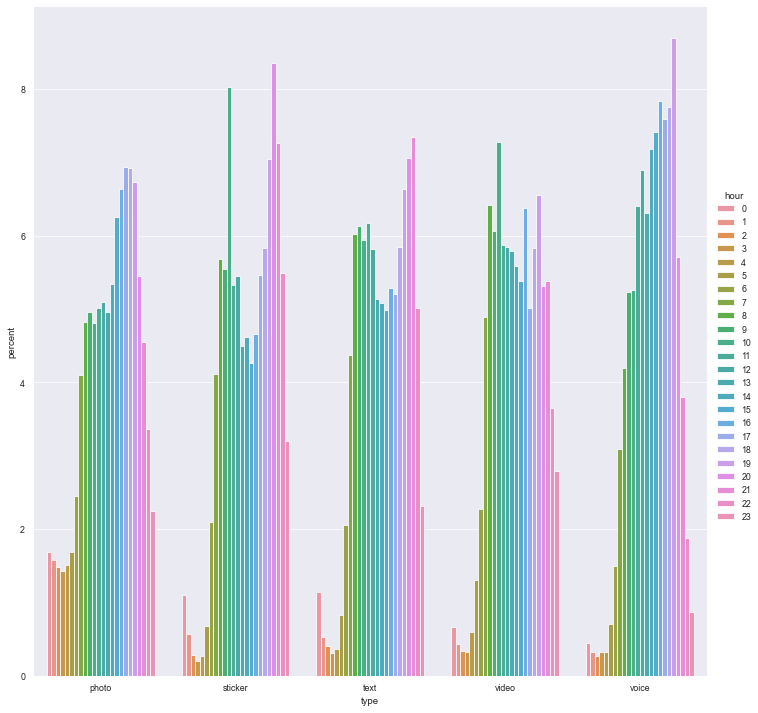

In [32]:
x,y = 'type', 'hour'

plot = df1.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent', hue=y, kind='bar', size=10)

In [83]:
#sns.countplot(data=df1, x='type', hue='hour')

#### Different type of messages

Text(0.5, 1.0, 'Number of messages of different types')

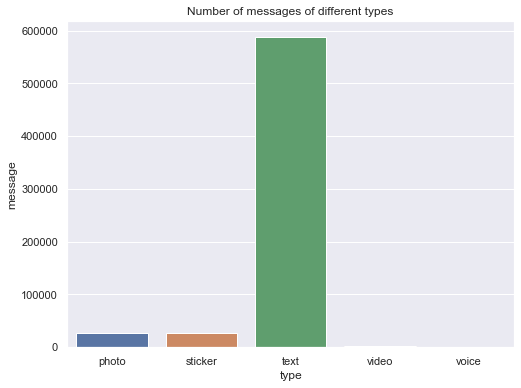

In [40]:
fr = df1.groupby(['type']).count()
fr['type'] = fr.index.get_level_values(0)
sns.barplot(x="type", y="message", data=fr).set_title('Number of messages of different types')

In [32]:
fr = df.groupby(["type"])["duration"].sum()
df.groupby(["type"])["duration"].sum()


type
Channel                 0.0
Group                   0.0
Private dialog          0.0
photo                   0.0
sticker                 0.0
text                    0.0
video             1073092.0
voice              467192.0
Name: duration, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

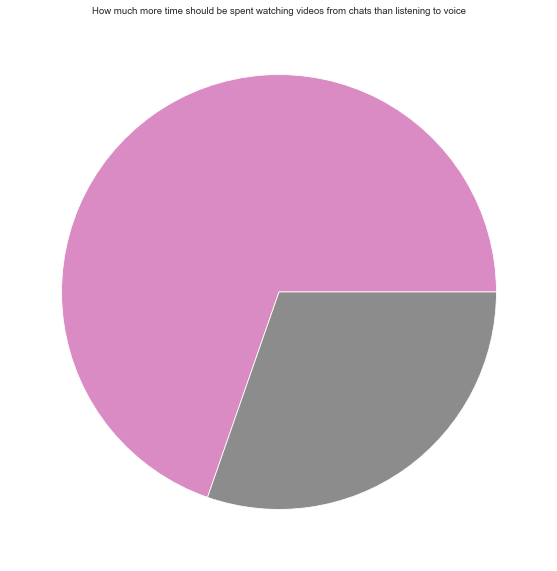

In [33]:
my_labels = ["Video", "Voice"]
plt.title('How much more time should be spent watching videos from chats than listening to voice')
plt.pie(fr)
plt.show

#### Different type of chats

Text(0.5, 1.0, 'Number of messages')

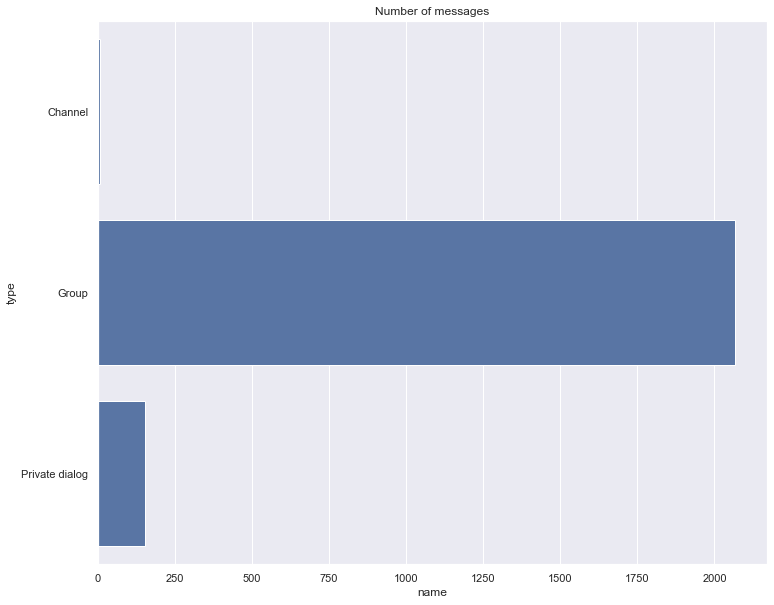

In [85]:
fr = df2.groupby(['type']).count()
fr['type'] = fr.index.get_level_values(0)
sns.barplot(x = "name", y="type", data=fr, color="b").set_title('Number of messages')

#### Which users send and receive messages most often

In [35]:
fr = df.groupby(["from_id"])["from_id"].count()
fr_sorted = fr.sort_values()
fr_sorted.tail(10)

from_id
PeerUser(user_id=372551595)      11786
PeerUser(user_id=1419351245)     12203
PeerUser(user_id=891078448)      12246
PeerUser(user_id=371105962)      13483
PeerUser(user_id=413405368)      14003
PeerUser(user_id=544701196)      14175
PeerUser(user_id=387335969)      16908
PeerUser(user_id=455550602)      17264
PeerUser(user_id=5086889948)     18997
PeerUser(user_id=564960030)     114555
Name: from_id, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

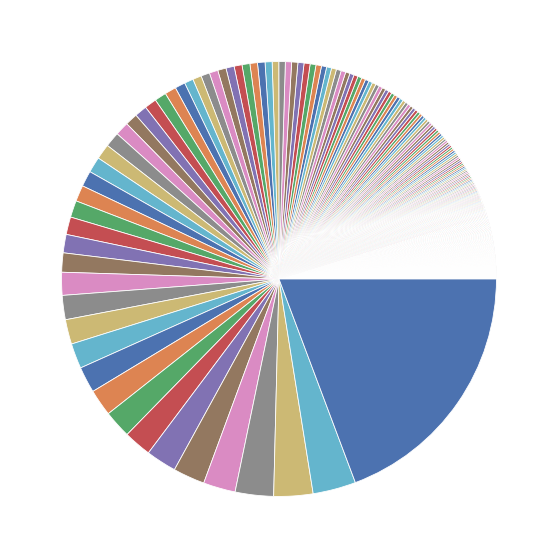

In [36]:
plt.pie(fr_sorted)
plt.show

In [35]:
#top = [['user_id=455550602', 17264], ['user_id=5086889948', 18997], ['user_id=564960030', 114555]]
top = [['Andrey_Khoptiy', 17264], ['romko_azhniuk', 18997], ["kryzhikk", 114555]]
df_top = pd.DataFrame(top, columns = ['user id', 'number of messages'])
print(df_top)

          user id  number of messages
0  Andrey_Khoptiy               17264
1   romko_azhniuk               18997
2        kryzhikk              114555


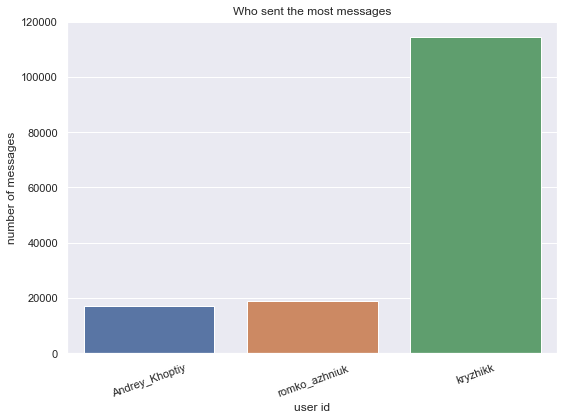

In [37]:
sns.barplot(x ="user id", y="number of messages", data=df_top).set_title('Who sent the most messages')
plt.xticks(rotation=20)
plt.tight_layout()

In [39]:
fr = df.groupby(["to_id"])["to_id"].count()
fr_sorted = fr.sort_values()
fr_sorted.tail(5)

to_id
PeerChannel(channel_id=1481887487)     48004
PeerChannel(channel_id=1213264961)     56542
PeerChannel(channel_id=1356176648)     74126
PeerChannel(channel_id=1260680685)    100000
564960030                             108817
Name: to_id, dtype: int64

In [40]:
top = [['564960030', 108817], ['channel_id=1260680685', 100000], ['channel_id=1356176648', 74126]]
df_top = pd.DataFrame(top, columns = ['user id', 'number of messages'])
print(df_top)

                 user id  number of messages
0              564960030              108817
1  channel_id=1260680685              100000
2  channel_id=1356176648               74126


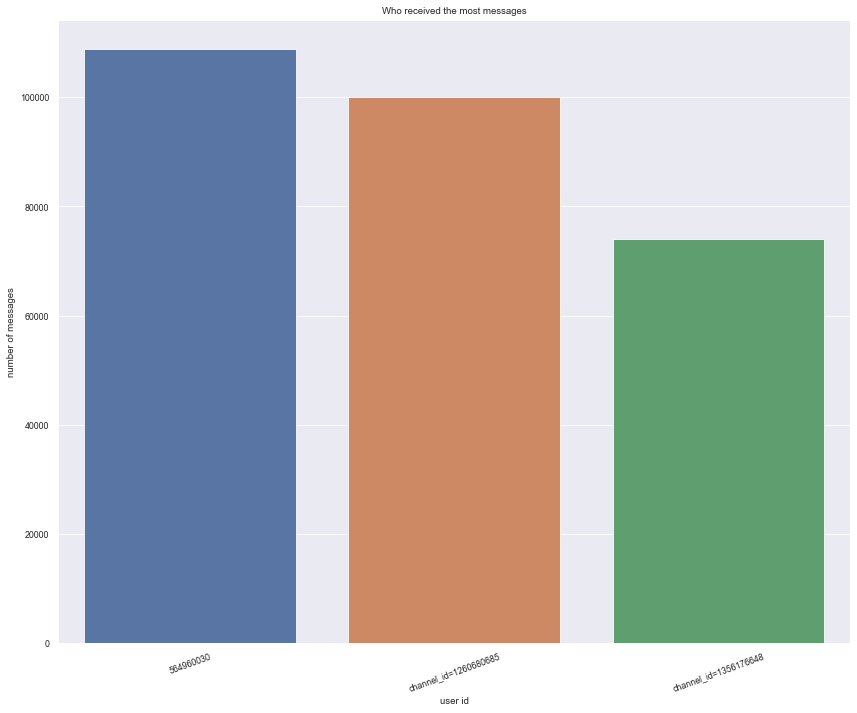

In [41]:
sns.barplot(x ="user id", y="number of messages", data=df_top).set_title('Who received the most messages')
plt.xticks(rotation=20)
plt.tight_layout()

#### Positive and negative messages

In [42]:
word1=df['message'].str.contains('щастя|радість|ура|вау|круто|чудово|хахаха|чарівно|казково|хорош|крутишка|молодець|сонечко|кицю').sum()
word2=df['message'].str.contains('сум|смерть|жах|піпец|треш|вбити|суїцид|гівно|фу|сука|їбать|нахуй|блять|пізда|піздец').sum()
word3=df['message'].str.contains('так|Так|ТАК|да|Да|ДА').sum()
word4=df['message'].str.contains('ні|Ні|НІ|нет|Нет|НЕТ').sum()
print(word1, word2, word3, word4)

9479 7194 92769 36081


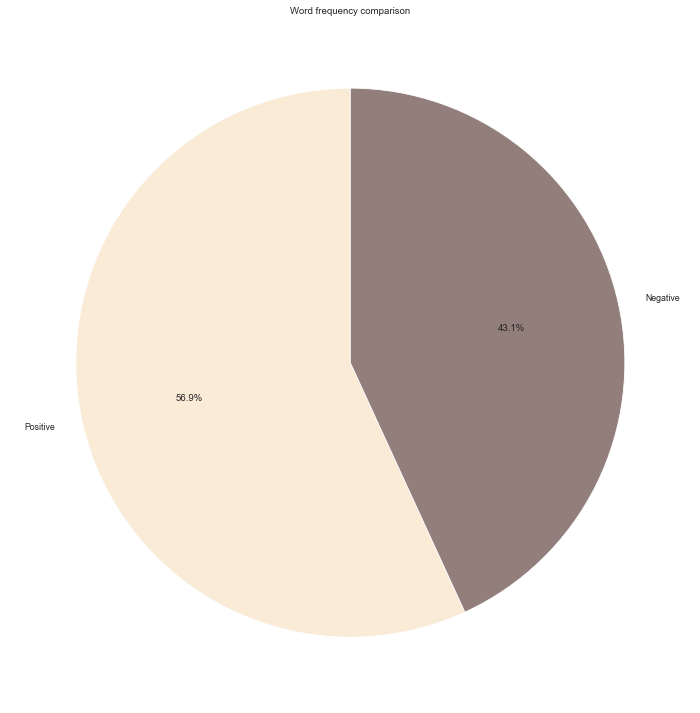

In [43]:
y = [word1, word2]
mylabels = ["Positive", "Negative"]
colors = ['#faebd7', '#927f7c']
plt.title('Word frequency comparison')
plt.pie(y, labels=mylabels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()

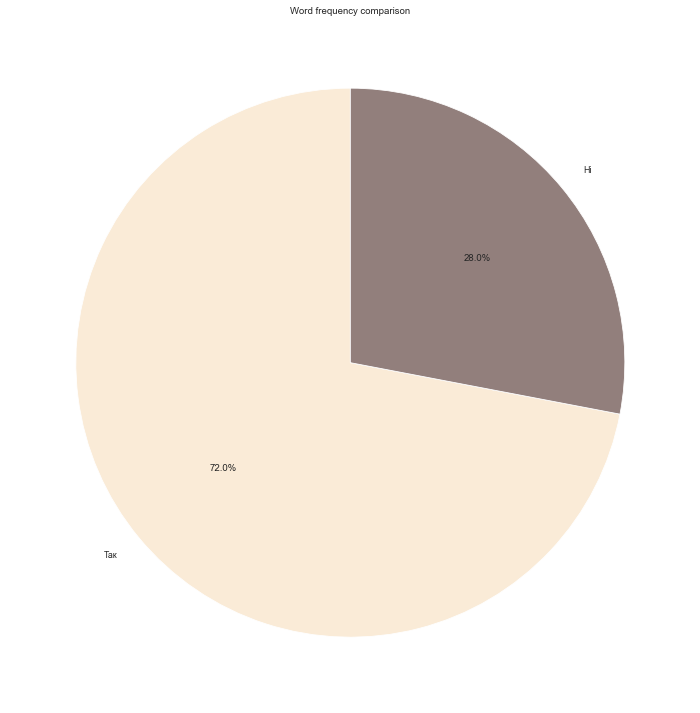

In [44]:
y = [word3, word4]
mylabels = ["Так", "Ні"]
colors = ['#faebd7', '#927f7c']
plt.title('Word frequency comparison')
plt.pie(y, labels=mylabels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.tight_layout()
plt.show()

#### My symbol smile

In [45]:
smile1=df['message'].str.contains(':3').sum()
smile2=df['message'].str.contains('<3').sum()
smile3=df['message'].str.contains('Т_Т').sum()
smile4=df['message'].str.contains('О_о').sum()
smile5=df['message'].str.contains('-_-').sum()
smile6=df['message'].str.contains(';-;').sum()
print(smile1, smile2, smile3, smile4, smile5, smile6)

1568 19 5 13 477 219


In [156]:
top = [[':3', smile1], ['<3', smile2], ['T_T', smile3], ['O_o', smile4], ['-_-', smile5], [';-;', smile6]]
df_top = pd.DataFrame(top, columns = ['symbols', 'number of times'])
print(df_top)

  symbols  number of times
0      :3             1568
1      <3               19
2     T_T                5
3     O_o               13
4     -_-              477
5     ;-;              219


Text(0.5, 1.0, 'My symbols')

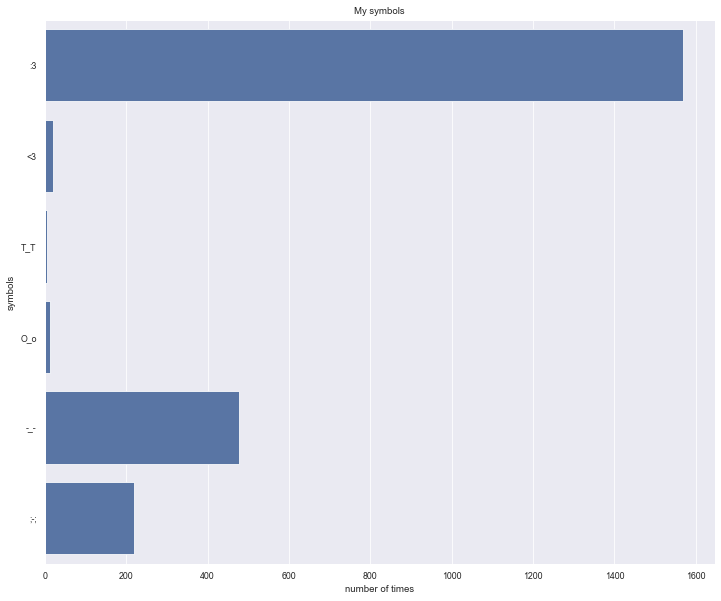

In [157]:
sns.barplot(x ="number of times", y="symbols", data=df_top, color="b").set_title('My symbols')

In [158]:
def generate_N_grams(message,ngram=1):
    words=pd.Series(' '.join(df1[~df1["message"].isna()]['message']).lower().split())
    temp=zip(*[words[i:] for i in range(0,ngram)])
    ans=[' '.join(ngram) for ngram in temp]
    return ans

D:\Programs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most popular 2-grams words')

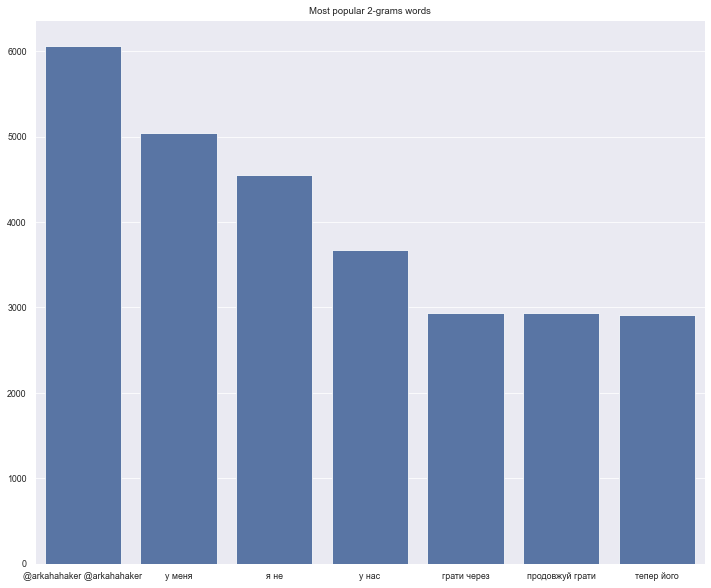

In [170]:
arr = generate_N_grams(" ", 2)
arr = Counter(arr)
arr = arr.most_common(7)

idx, values = zip(*arr)
a = pd.Series(values, idx)
sns.barplot(a.index, a.values, color="b").set_title('Most popular 2-grams words')